In [25]:
import numpy as np 
import pandas as pd 

#Görselleştirme Kütüphaneleri
import seaborn as sns
import matplotlib.pyplot as plt

#Makine öğrenmesi gereçleri
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#Makine öğrenmesi algoritmaları
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

import imblearn
from imblearn.over_sampling import SMOTE

import os
import warnings

# Çıktılarda karmaşıklığa sebep olduğu için uyarılırı iptal ediyoruz
warnings.filterwarnings("ignore")
print(os.listdir("../input"))

['red-wine-quality-cortez-et-al-2009']


# Veri Setini Kontrol Edelim



In [13]:

df=pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Veri setinde hiç boş değer yoktur


In [15]:
print("Kalite Seviyeleri:",df["quality"].unique())

Kalite Seviyeleri: [5 6 7 4 8 3]


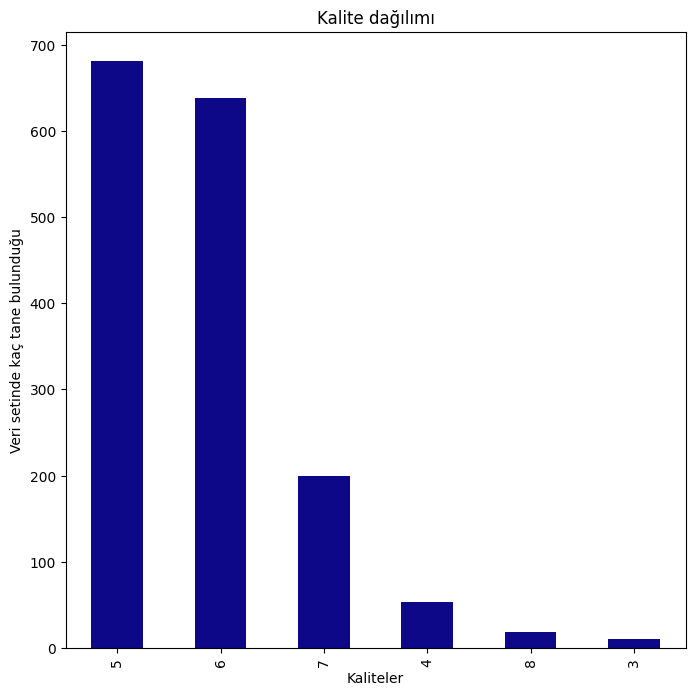

In [16]:
plt.figure(1, figsize=(8,8))
df['quality'].value_counts().plot.bar(colormap="plasma") 

plt.title("Kalite dağılımı");
plt.xlabel("Kaliteler");
plt.ylabel("Veri setinde kaç tane bulunduğu");

Veri setinde dengesiz bir sınıf dağılımı mevcuttur ve bu makine öğrenmesi için istenilmeyen bir durum.Bunun için 'stratify' özelliğini kullanacağız.

In [17]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [18]:
selected_features=['residual sugar', 'total sulfur dioxide', 'sulphates',
                   'alcohol', 'volatile acidity', 'quality']
df_selected_features=df[selected_features]
df_selected_features.head(5)

,residual sugar,total sulfur dioxide,sulphates,alcohol,volatile acidity,quality
0,1.9,34.0,0.56,9.4,0.70,5
1,2.6,67.0,0.68,9.8,0.88,5
2,2.3,54.0,0.65,9.8,0.76,5
3,1.9,60.0,0.58,9.8,0.28,6
4,1.9,34.0,0.56,9.4,0.70,5


Veri setimiz üzerinden belli başlı sütünları seçtikten sonra kaliteyi nasıl etkilediklerine bakalım.

In [19]:
condition1=(df_selected_features["quality"]==3)|(df_selected_features["quality"]==4)
condition2=(df_selected_features["quality"]==5)|(df_selected_features["quality"]==6)
condition3=(df_selected_features["quality"]==7)|(df_selected_features["quality"]==8)

level_34=round(df_selected_features[condition1].describe(),2)
level_56=round(df_selected_features[condition2].describe(),2)
level_78=round(df_selected_features[condition3].describe(),2)

level_all=pd.concat([level_34,level_56,level_78],axis=1,keys=["Level_34","Level_56","Level_78"])

level_all.T

count   mean    std   min    25%    50%  \
Level_34 residual sugar          63.0   2.68   1.72  1.20   1.90   2.10   
         total sulfur dioxide    63.0  34.44  26.40  7.00  13.50  26.00   
         sulphates               63.0   0.59   0.22  0.33   0.50   0.56   
         alcohol                 63.0  10.22   0.92  8.40   9.60  10.00   
         volatile acidity        63.0   0.72   0.25  0.23   0.56   0.68   
         quality                 63.0   3.84   0.37  3.00   4.00   4.00   
Level_56 residual sugar        1319.0   2.50   1.40  0.90   1.90   2.20   
         total sulfur dioxide  1319.0  48.95  32.71  6.00  24.00  40.00   
         sulphates             1319.0   0.65   0.17  0.37   0.54   0.61   
         alcohol               1319.0  10.25   0.97  8.40   9.50  10.00   
         volatile acidity      1319.0   0.54   0.17  0.16   0.41   0.54   
         quality               1319.0   5.48   0.50  5.00   5.00   5.00   
Level_78 residual sugar         217.0   2.71   1.36  1.20   2.00   2.30   
         total sulfur dioxide   217.0  34.89  32.57  7.00  17.00  27.00   
         sulphates              217.0   0.74   0.13  0.39   0.65   0.74   
         alcohol                217.0  11.52   1.00  9.20  10.80  11.60   
         volatile acidity       217.0   0.41   0.14  0.12   0.30   0.37   
         quality                217.0   7.08   0.28  7.00   7.00   7.00   

                                 75%     max  
Level_34 residual sugar         2.95   12.90  
         total sulfur dioxide  48.00  119.00  
         sulphates              0.60    2.00  
         alcohol               11.00   13.10  
         volatile acidity       0.88    1.58  
         quality                4.00    4.00  
Level_56 residual sugar         2.60   15.50  
         total sulfur dioxide  65.00  165.00  
         sulphates              0.70    1.98  
         alcohol               10.90   14.90  
         volatile acidity       0.64    1.33  
         quality                6.00    6.00  
Level_78 residual sugar         2.70    8.90  
         total sulfur dioxide  43.00  289.00  
         sulphates              0.82    1.36  
         alcohol               12.20   14.00  
         volatile acidity       0.49    0.92  
         quality                7.00    8.00

Yukarıdaki grafikte görüldüğü üzere:
    Şarabın kalitesi,alkol ve sülfat ile doğru orantılı iken ucucu asitlik ile ters orantılıdır yani alkol ve sülfat değeri arttığında kalite artarken     uçucu asitlik arttığında kalitemiz azalıyor.

# Görselleştirelim

In [42]:
import seaborn as sns
def draw_multivarient_plot(df, rows, cols, plot_type):
    """
    df: Veri seti
    rows: Satır sayısı
    cols: sütün sayısı
    plot_type: Çizdirilecek grafik türü
    """
    
    #Veri setindeki sütünların isimleri alınıyor
    column_names=df.columns.values
    #Kaç tane sütün olduğu bulunuyor
    number_of_column=len(column_names)
    
    #Satır*sütün boyutlarında alt grafik içeren
    #matris oluşturuluyor. Matrisin genişliği:22 yüksekliği:16
    fig, axarr=plt.subplots(rows,cols, figsize=(22,16))

    counter=0# Çizimi yapılacak özelliğin column_names listesindeki indeks değerini tutuyor
    for i in range(rows):
        for j in range(cols):
            """
            i: satır numarasını tutuyor
            j: sütün numarasını tutuyor
            axarr[i][j]: Çizilen grafigin grafik matrisindeki yerini belirliyor
            """
            if 'violin' in plot_type:
                sns.violinplot(x='quality', y=column_names[counter],data=df, ax=axarr[i][j])
            elif 'box'in plot_type :
                sns.boxplot(x='quality', y=column_names[counter],data=df, ax=axarr[i][j])
            elif 'point' in plot_type:
                sns.pointplot(x='quality',y=column_names[counter],data=df, ax=axarr[i][j])
            elif 'bar' in plot_type:
                sns.barplot(x='quality',y=column_names[counter],data=df, ax=axarr[i][j])
                
            counter+=1
            if counter==(number_of_column-1,):
                break



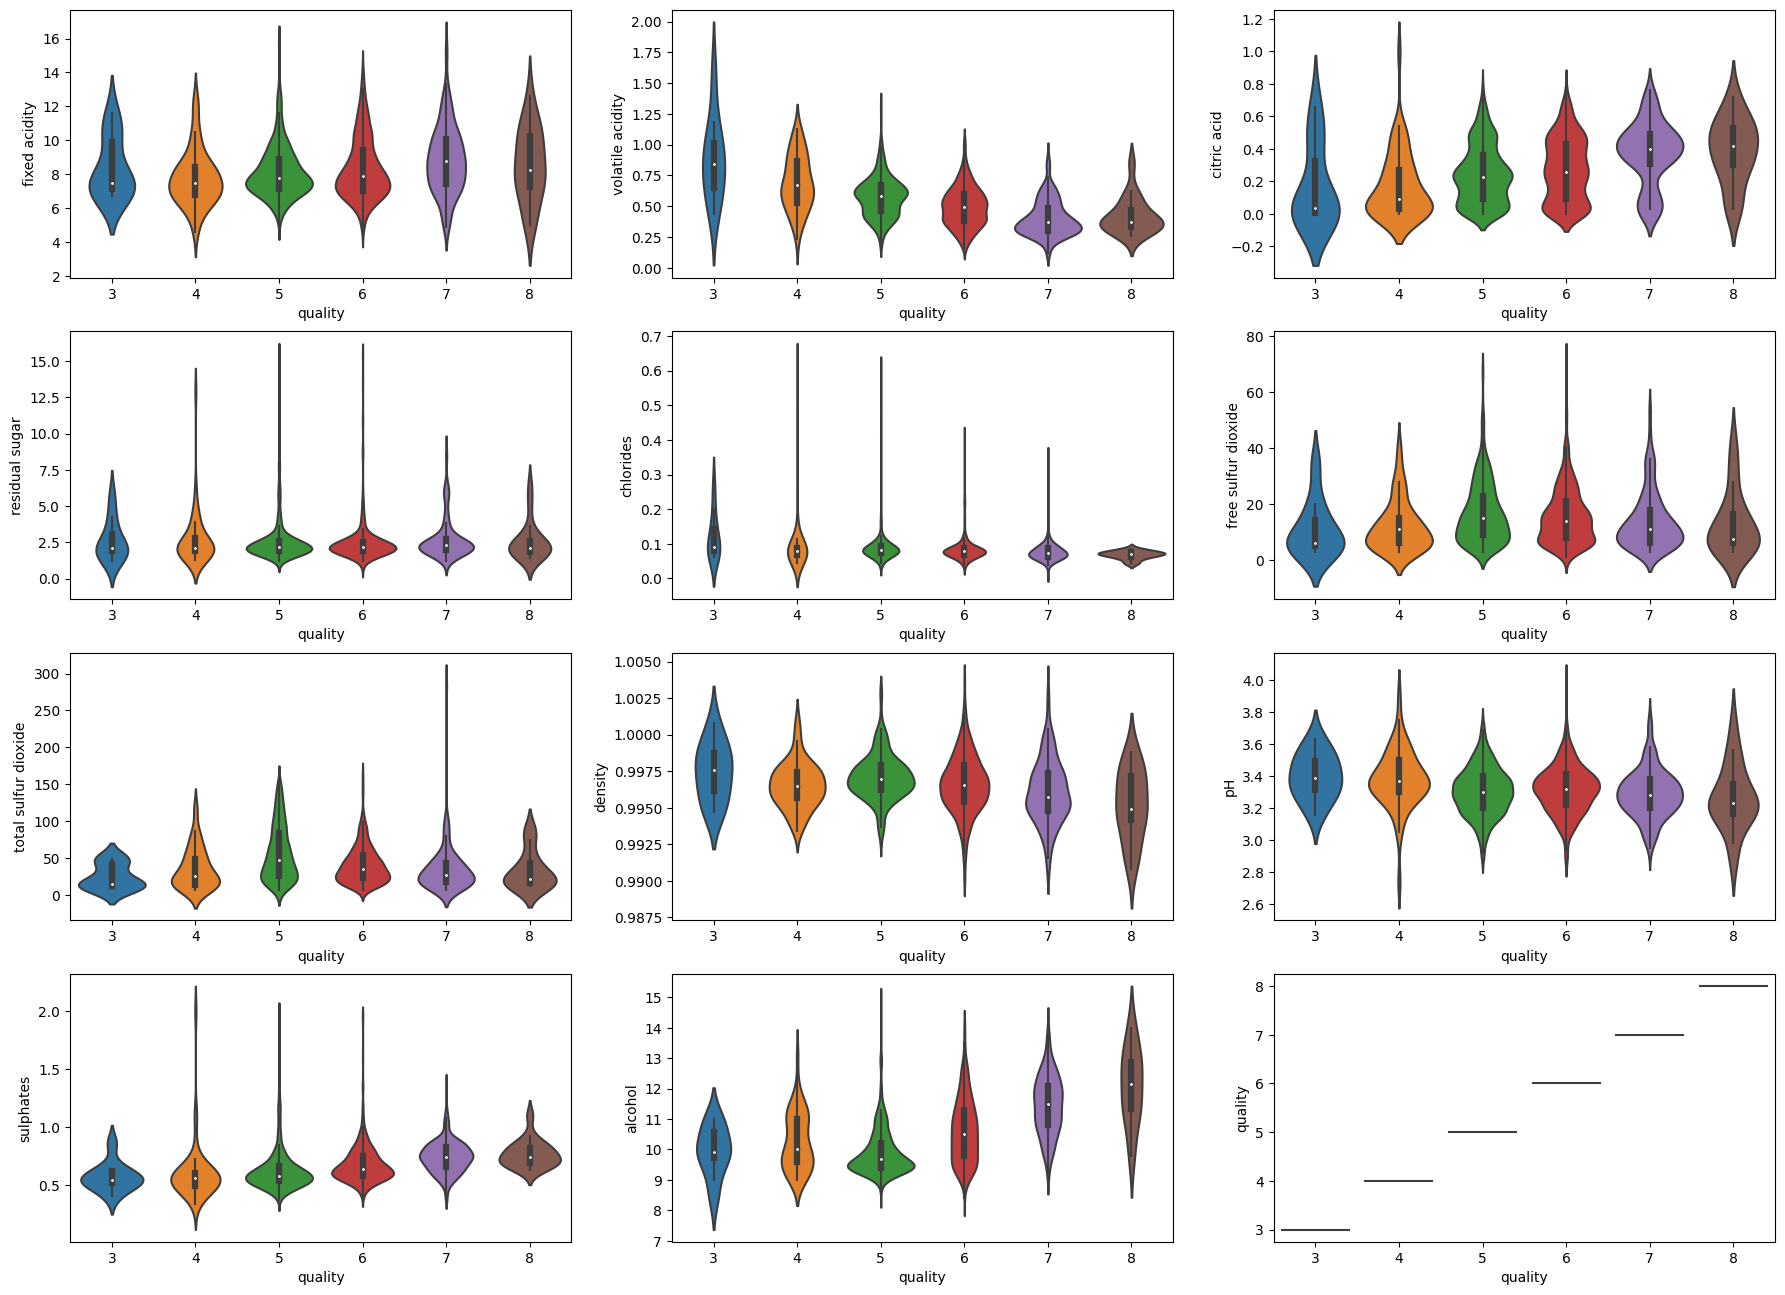

In [43]:
draw_multivarient_plot(df,4,3,"violin")

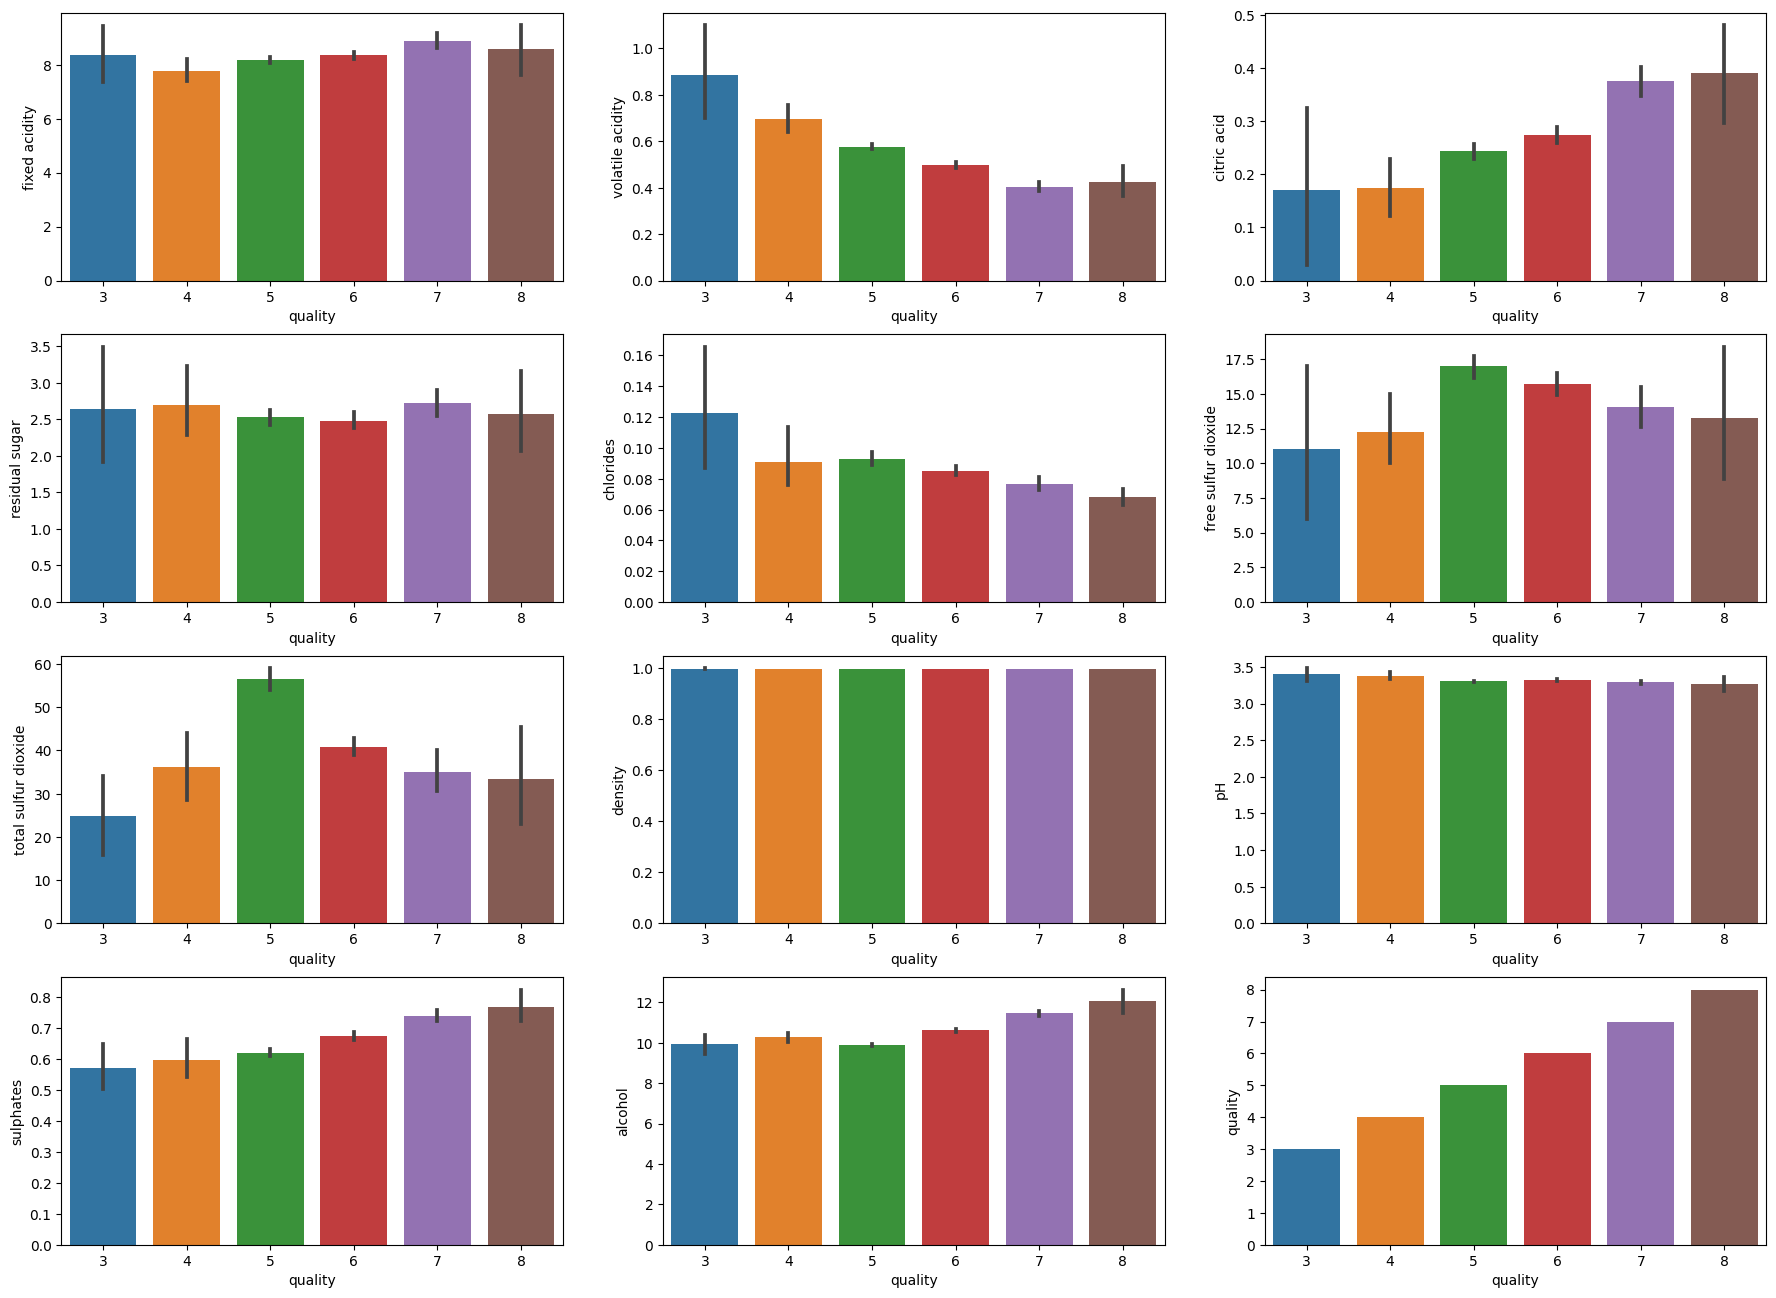

In [32]:
draw_multivarient_plot(df,4,3,"bar")

In [34]:
def get_models():
    models=[]
    models.append(("LR",LogisticRegression()))
    models.append(("NB",GaussianNB()))
    models.append(("KNN",KNeighborsClassifier()))
    models.append(("DT",DecisionTreeClassifier()))
    models.append(("SVM rbf",SVC()))
    models.append(("SVM linear",SVC(kernel='linear')))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    #Yukarıda models adlı bir lsite oluşturup kullanmamız muhtemel modelleri içine yerleştirdik.
    return models

def cross_validation_scores_for_various_ml_models(X_cv, y_cv): #Burada ise çapraz doğrulama işlemini uygulayacağımız sınıfımız var.
    print("Çapraz Doğrulama Başarı Oranları".upper())
    models=get_models()


    results=[]
    names= []

    for name, model in models:
        kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=22) #**BURADA STRATİFY ÖZELLİĞİNİ KULLANIYORUZ.
        cv_result=cross_val_score(model,X_cv, y_cv, cv=kfold,scoring="accuracy")#cross_val_score kütüphanenin içinde(sklearn.model_selection)
        names.append(name)
        results.append(cv_result)
        print("{} modelinin çapraz doğrulaması yapıldı, başarı oranı:{:0.2f}".format(name, cv_result.mean()))


In [35]:
dataset_temp=df.copy(deep=True)
X=df.drop('quality', axis=1) #axis=1 sütun boyunca uygulanır demektir.
y=df['quality']

X=StandardScaler().fit_transform(X)
cross_validation_scores_for_various_ml_models(X, y)

ÇAPRAZ DOĞRULAMA BAŞARI ORANLARI
LR modelinin çapraz doğrulaması yapıldı, başarı oranı:0.60
NB modelinin çapraz doğrulaması yapıldı, başarı oranı:0.55
KNN modelinin çapraz doğrulaması yapıldı, başarı oranı:0.58
DT modelinin çapraz doğrulaması yapıldı, başarı oranı:0.61
SVM rbf modelinin çapraz doğrulaması yapıldı, başarı oranı:0.62
SVM linear modelinin çapraz doğrulaması yapıldı, başarı oranı:0.58
LDA modelinin çapraz doğrulaması yapıldı, başarı oranı:0.59


Yukarıda bütün kalite değerlerimiz ile çapraz sorgulama değerlerini oluşturduk ve başarı oranlarını gördük.Şimdi ise bu kalite değerlerimizi gruplandırarak başarı oranlarımıza bakalım.


In [36]:
dataset_temp2=df.copy(deep=True)
dataset_temp2.loc[(dataset_temp2['quality']==3),'quality']=1
dataset_temp2.loc[(dataset_temp2['quality']==4),'quality']=1

dataset_temp2.loc[(dataset_temp2['quality']==5),'quality']=2
dataset_temp2.loc[(dataset_temp2['quality']==6),'quality']=2

dataset_temp2.loc[(dataset_temp2['quality']==7),'quality']=3
dataset_temp2.loc[(dataset_temp2['quality']==8),'quality']=3

dataset_temp2['quality'].value_counts()


quality
2    1319
3     217
1      63
Name: count, dtype: int64

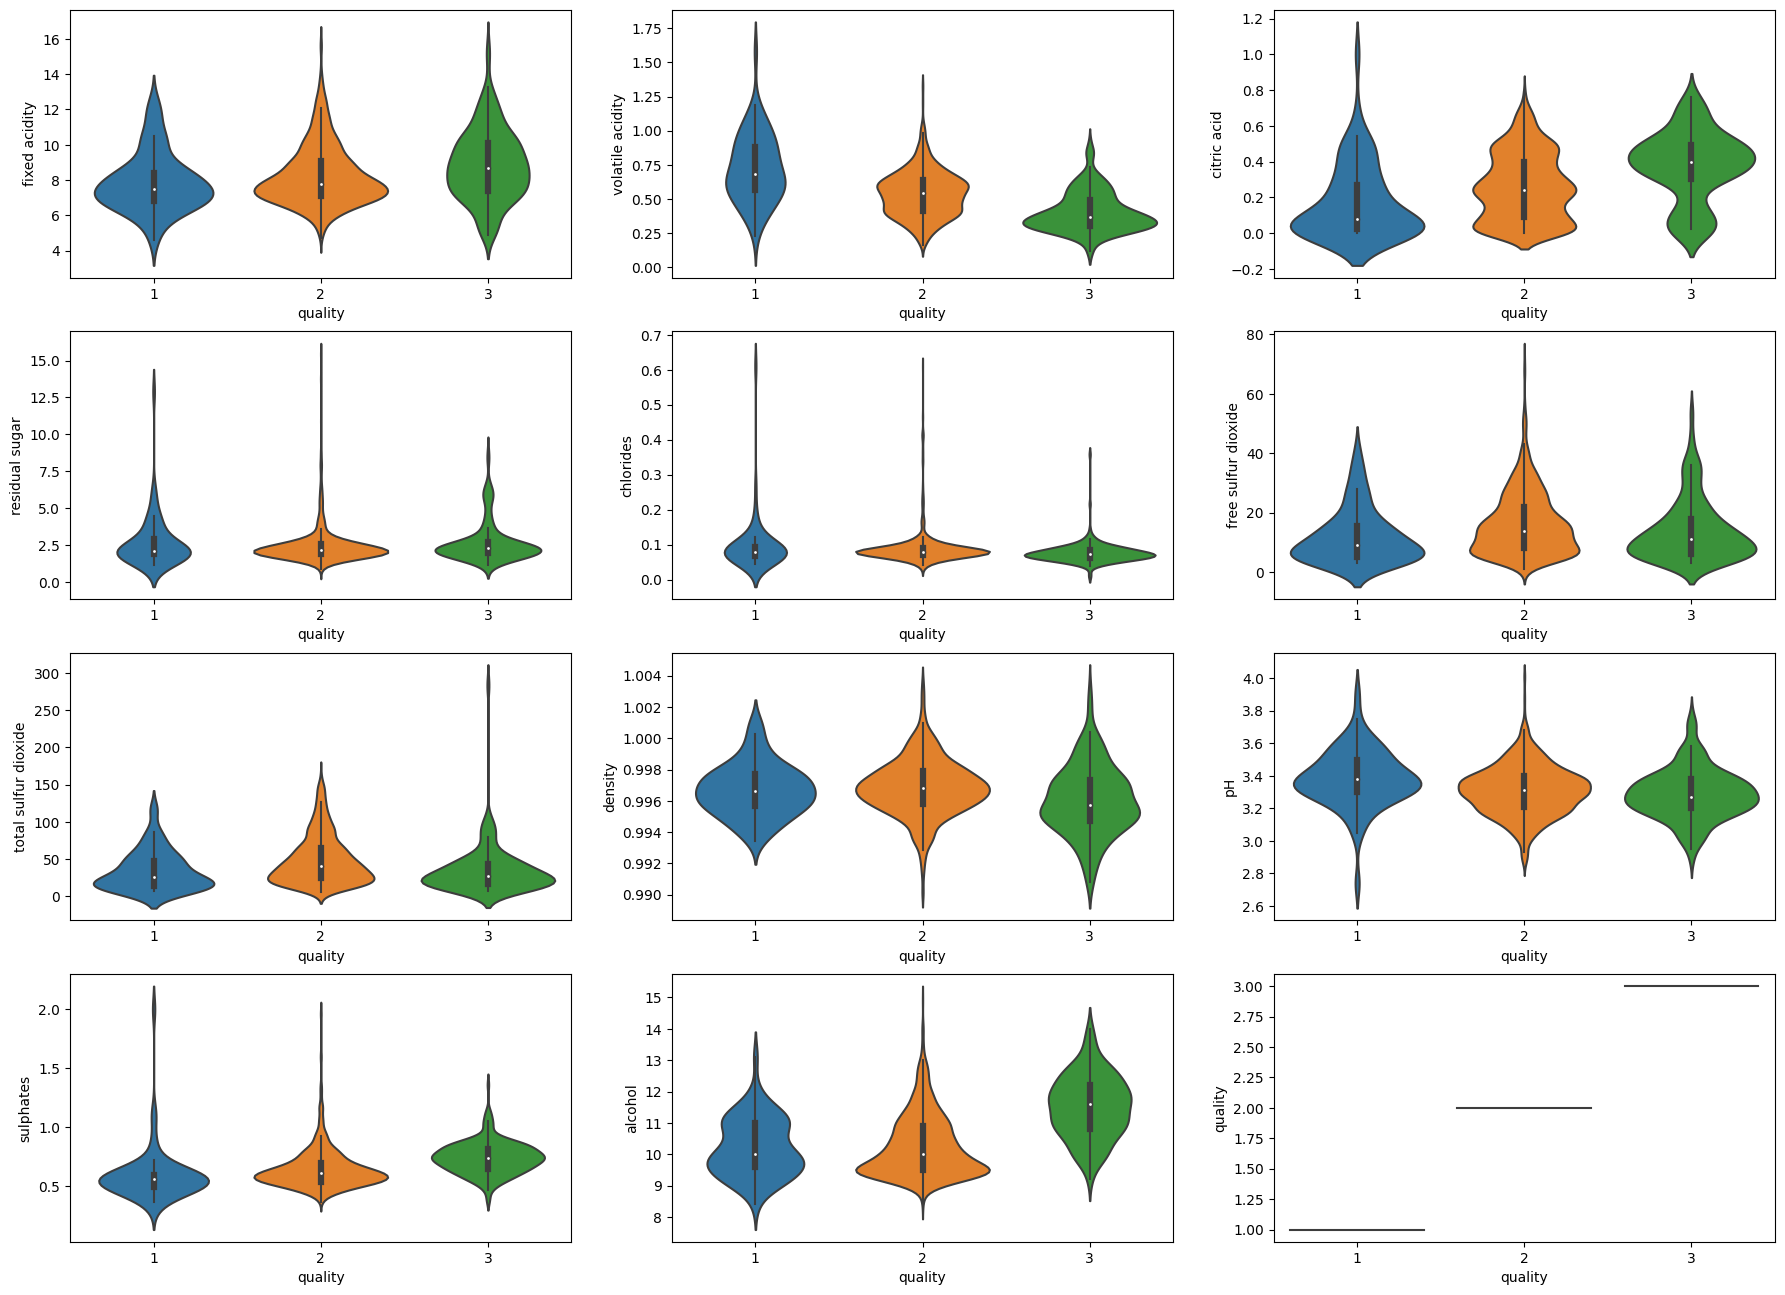

In [37]:
draw_multivarient_plot(dataset_temp2,4,3,"violin")

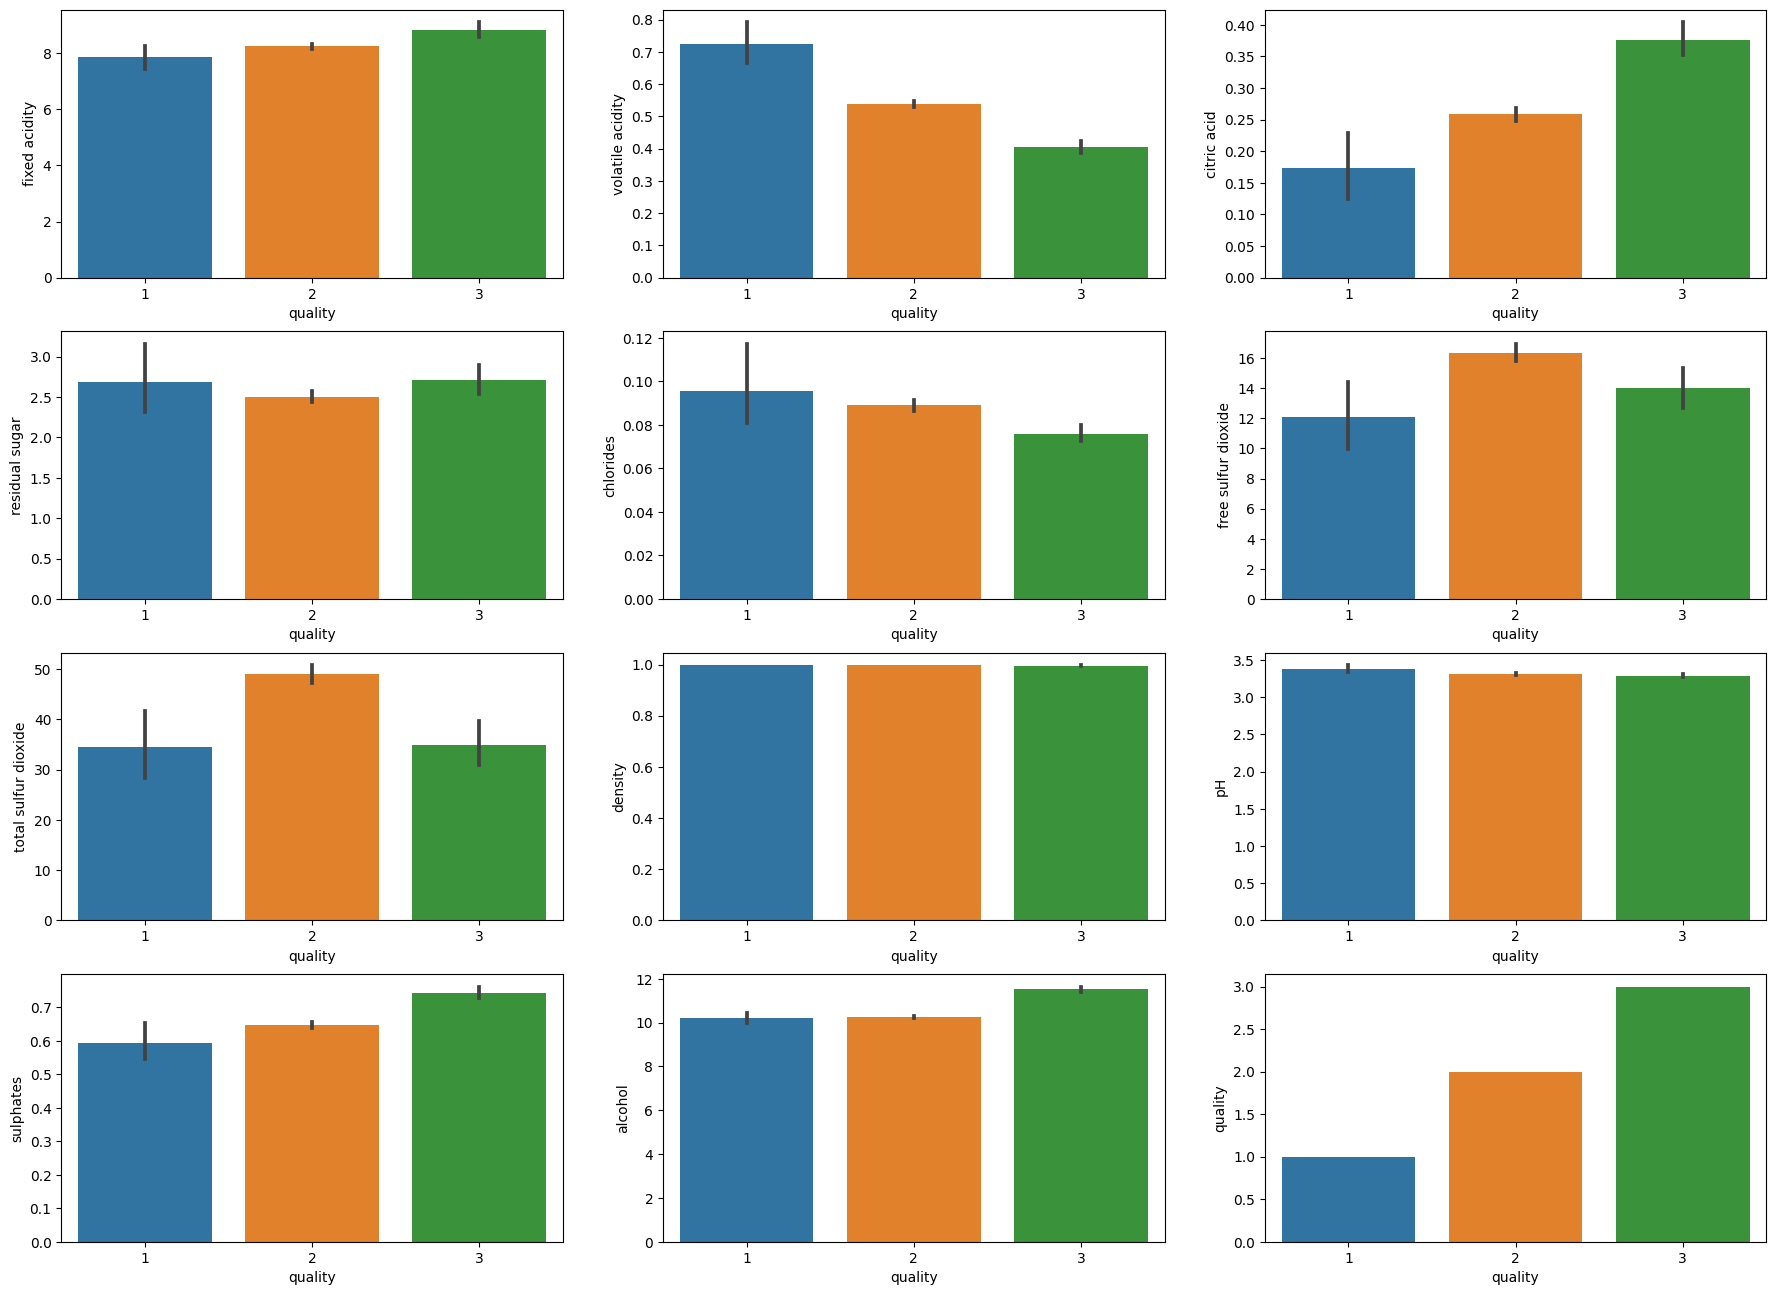

In [38]:
draw_multivarient_plot(dataset_temp2,4,3,"bar")

In [39]:
X_temp=dataset_temp2.drop('quality', axis=1)
y_temp=dataset_temp2['quality']
X_temp=StandardScaler().fit_transform(X_temp)

X_train_temp, X_test_temp, y_train_temp, y_test_temp=train_test_split(X_temp,
                                                                      y_temp,
                                                                      stratify=y_temp,
                                                                      test_size=0.3,
                                                                      random_state=42)


cross_validation_scores_for_various_ml_models(X_temp, y_temp)

ÇAPRAZ DOĞRULAMA BAŞARI ORANLARI
LR modelinin çapraz doğrulaması yapıldı, başarı oranı:0.84
NB modelinin çapraz doğrulaması yapıldı, başarı oranı:0.78
KNN modelinin çapraz doğrulaması yapıldı, başarı oranı:0.83
DT modelinin çapraz doğrulaması yapıldı, başarı oranı:0.81
SVM rbf modelinin çapraz doğrulaması yapıldı, başarı oranı:0.85
SVM linear modelinin çapraz doğrulaması yapıldı, başarı oranı:0.82
LDA modelinin çapraz doğrulaması yapıldı, başarı oranı:0.83
